# 1. Matplotlib API
Matplotlib is a famous visualization library in Python, is the foundation for many other visualization libraries. Matplotlib along with NumPy can be considered equivalent to Matlab.

This topic focuses only on Pyplot - the most essential sub-module of Matplotlib and how to use it to build graphs of mathematical functions. For data visualization plots such as bar chart, histogram or pie chart, there are other libraries that do a better job than Matplotlib, and they will be discussed on later topics.

*Reference: [Matplotlib - Axes API](https://matplotlib.org/stable/api/axes_api.html)*

# Data Science
[![NBViewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/hungpq7/data-science/tree/main/)
[![MyBinder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/hungpq7/data-science/main)
[![GoogleColab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/drive/folders/1Rm4c_0G4R7Cyopcenzx7-EnCt3bR4HL7)

Data Analysis &bull; Data Visualization &bull; Machine Learning &bull; Deep Learning

[![Made with Python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)
[![Made with Markdown](https://img.shields.io/badge/Made%20with-Markdown-1f425f.svg)](http://commonmark.org)
[![Made with LaTex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/)
![JupyterLab](https://img.shields.io/badge/jupyterlab-3.x-orange?logo=jupyter)
![Python](https://img.shields.io/badge/python-3.7+-blue?logo=python)

## 1.1. Plotting interfaces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

#### Object-oriented interface
Every plot created by Matplotlib is under the the control of two objects, `figure` and `axes`.
- A `figure` object is the whole image generated by Matplotlib, where everything is drawn on. It is a top-level object and works as a container for a number of `axes` objects.
- Each `axes` object (a pair of *axes*), usually refers to a 2-dimensional Cartesian coordinate system. It gives access to plot elements such as plots, labels, titles, text.

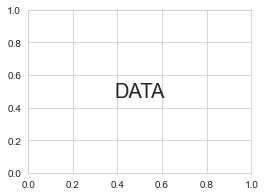

In [3]:
# create a figure
fig = plt.figure(figsize=(4,3))

# add an axes with some text
ax = fig.add_subplot()
ax.text(0.5, 0.5, 'DATA', ha='center', va='center', size=20)

plt.show()

Instead of creating `figure` and `axes` independently, Matplotlib provides a single function `subplots()` creates the two objects at once. This function is highly recommended in practice, and the introduction to the previous method is to clarify how `figure` and `axes` work and how they are related.

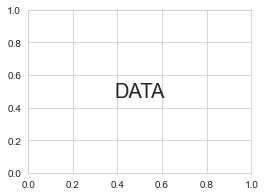

In [11]:
fig, ax = plt.subplots(figsize=(4,3))
ax.text(0.5, 0.5, 'DATA', ha='center', va='center', size=20)
plt.show()

When there is more than one *axes*, Matplotlib arranges them in a matrix of `axes` objects. Accessing each *axes* can be done using NumPy's array slicing.

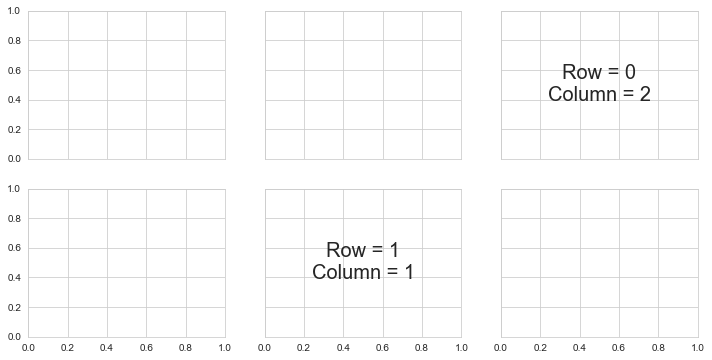

In [2]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6), sharex=True, sharey=True)
ax[0,2].text(0.5, 0.5, 'Row = 0\nColumn = 2', ha='center', va='center', size=20)
ax[1,1].text(0.5, 0.5, 'Row = 1\nColumn = 1', ha='center', va='center', size=20)
plt.show()

#### State-machine interface
Besides object-oriented interface, Matplotlib also provides another way that makes use of state-machine to create plots. When using this method, the state-machine implicitly and automatically creates *figures* and *axes* to achieve the desired plot. Then a set of simple functions are used to add plot elements to the current *axes* in the current *figure*.

Comparing to object-oriented, state-machine interface is a bit more convenient for making a single *axes*, but it is not recommended for arranging multiple *axes*. Overall, object-oriented interface is still the go-to method.

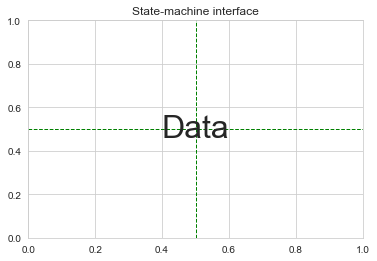

In [27]:
plt.text(0.5, 0.5, 'Data', ha='center', va='center', size=32)
plt.axvline(x=0.5, lw=1, color='g', linestyle='--')
plt.axhline(y=0.5, lw=1, color='g', linestyle='--')
plt.title('State-machine interface')
plt.show()

## 1.2. Controlling axes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

#### Equalizing axes
Graphs require the two axes to have the same scale.

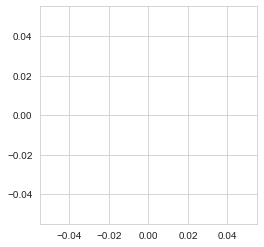

In [15]:
fig, ax = plt.subplots()

# make the two axes scaled
ax.axis('scaled')

# set tick frequencies of both axes to be 0.02
ax.xaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))

plt.show()

#### Axes limits

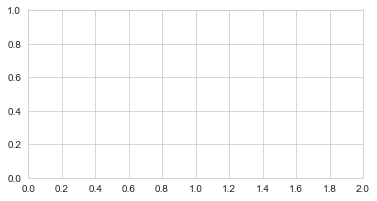

In [16]:
fig, ax = plt.subplots()
ax.axis('scaled')

# set limit for each axis
ax.set_xlim(0, 2)
ax.set_ylim(0, 1)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
plt.show()

#### Formatting axes

In [13]:
def axis_formatter(value, tick):
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 2:
        return r"$\pi$"
    elif N == -2:
        return r'$-\pi$'
    elif N % 2 == 1 and N > 0:
        return fr"$\frac{{{N}}}{{2}}\pi$"
    elif N % 2 == 1 and N < 0:
        return fr"$-\frac{{{-N}}}{{2}}\pi$"
    else:
        return fr"${N//2}\pi$"

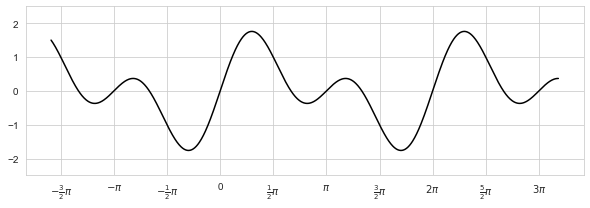

In [14]:
x = np.linspace(-5, 10, 1000)
y = np.sin(x) + np.sin(2*x)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, 'k')
ax.axis('scaled')

# set x-tick frequency to be pi/2 and apply a custom format strategy
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_major_formatter(plt.FuncFormatter(axis_formatter))

ax.set_ylim(-2.5, 2.5)
plt.show()

## 1.3. Plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

#### Graphs
Matplotlib does not really have a way to make graphs, but this can be achieved indirectly by using the `axes.plot` method. The original functionality of this function is to plot a polyline connects data points.

It has an optional parameter, `fmt` that defines basic formatting following the syntax: `'{marker}{linestyle}{color}'`. The formatting string must not stricly follow the order in the syntax, but note that the parsing may be ambiguos. The table below summarizes some useful formatting strings:

|Parameter|Character|Meaning|
|:---|:---|:---|
|`marker`|`'.'`|point marker|
|`marker`|`'o'`|big point marker|
|`linestyle`|`'-'`|solid line style|
|`linestyle`|`'--'`|dashed line style|
|`linestyle`|`':'`|dotted line style|
|`linestyle`|`'-.'`|dash-dot line style|
|`color`|`'k'`|black|
|`color`|`'r'`|red|
|`color`|`'c'`|cyan|
|`color`|`'m'`|magenta|
|`color`|`'g'`|green|

With different comnbinations of formatting strings, `axes.plot` can result in graphs (indirectly) and points (directly). In order to make graphs, the input for x-axis needs to be a dense set of values.

*Reference: [Matplotlib - matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)*

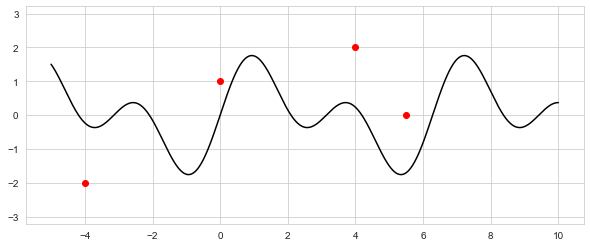

In [33]:
x1 = np.linspace(-5, 10, 1000)
y1 = np.sin(x1) + np.sin(2*x1)
x2 = np.array([0, 4, 5.5, -4])
y2 = np.array([1, 2, 0, -2])

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x1, y1, 'k')
ax.plot(x2, y2, 'or')
ax.axis('equal')
plt.show()

#### Spans

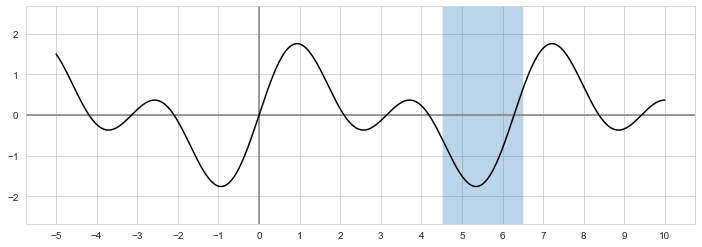

In [34]:
x = np.linspace(-5, 10, 1000)
y = np.sin(x) + np.sin(2*x)

fig, ax = plt.subplots(figsize=(12,4))

# add two lines represent the two axes
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')

# add a vertical span across y-axis
ax.axvspan(xmin=4.5, xmax=6.5, alpha=0.3)

ax.plot(x, y, 'k')
ax.axis('equal')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

plt.show()

#### Vectors
The `ax.quiver` method in Matplotlib allows plotting vectors. It has five important parameters, which must have the same length:
- `X` and `Y` locate the origins of vectors
- `U` and `V` define the vectors
- `color` sets vector colors

For some reasons, the following parameters must always be set in order to draw vectors correctly: `scale_units='xy'`, `angles='xy'` and `scale=1`

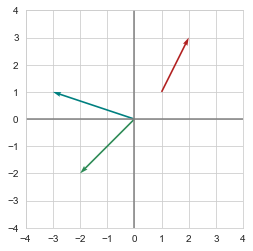

In [51]:
fig, ax = plt.subplots()
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.quiver(
    [1, 0, 0],
    [1, 0, 0],
    [1, -3, -2],
    [2, 1, -2],
    color=['firebrick', 'teal', 'seagreen'],
    scale_units='xy',
    angles='uv',
    scale=1
)
ax.axis('scaled')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
plt.show()

## 1.4. Annotations

#### Labels

#### Legends

# 2. Mathematical functions

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*